# Visualziation

In [117]:
# Import useful libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from shapely.geometry import Point

In [118]:
# Histograms for 5 independend variables
# file path
file_path = 'C:\\Users\\MSI\\Documents\\Clone_1\\Assignment-1\\Hackathon\\csv\\MergedData.csv'

# read the .csv  file
dataset = pd.read_csv(file_path)

# check the dataset
dataset.head()

,Unnamed: 0,OBJECTNUMMER,CBS_Wijkcode,Area code,Area,Rent: average,Average house-value for tax purposes,Area public green (ha),Parking spots total,Mean disposable household income,Most vulnerable (%),Safety index: High Impact Crime,geometry,LNG,LAT,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,0,1.0,BU0363EQ,EQ,Da Costabuurt,823.0,498536.0,0.68,971.0,49800.0,52.0,130.0,"POLYGON ((4.867406 52.371797, 4.869586 52.3686...",4.872108,52.370130,GE05,"Oud-West, De Baarsjes",E,West,257542.0
1,1,2.0,BU0363ER,ER,Westindische Buurt,861.0,443995.0,2.01,1763.0,50500.0,54.0,89.0,"POLYGON ((4.848885 52.358045, 4.848892 52.3579...",4.854062,52.361007,GE05,"Oud-West, De Baarsjes",E,West,345503.0
2,2,3.0,BU0363KB,KB,Schinkelbuurt,774.0,445304.0,1.80,972.0,46200.0,51.0,104.0,"POLYGON ((4.848181 52.342768, 4.849791 52.3429...",4.852877,52.349646,GK11,Oud-Zuid,K,Zuid,344932.0
3,3,4.0,BU0363KC,KC,Willemspark,1349.0,1064407.0,16.38,2624.0,131700.0,55.0,51.0,"POLYGON ((4.855085 52.35641, 4.855027 52.35632...",4.862796,52.354371,GK11,Oud-Zuid,K,Zuid,695818.0
4,4,5.0,BU0363KD,KD,Museumkwartier,1051.0,1011630.0,17.53,4839.0,103000.0,55.0,219.0,"POLYGON ((4.86554 52.358854, 4.867135 52.35610...",4.876464,52.355265,GK11,Oud-Zuid,K,Zuid,1380178.0


In [119]:
# choosing the columns we want to include in histogram

columns_data = dataset[['Rent: average', 'Average house-value for tax purposes',
                         'Area public green (ha)', 'Parking spots total', 'Mean disposable household income'
                           ,'Safety index: High Impact Crime', 'Most vulnerable (%)']]


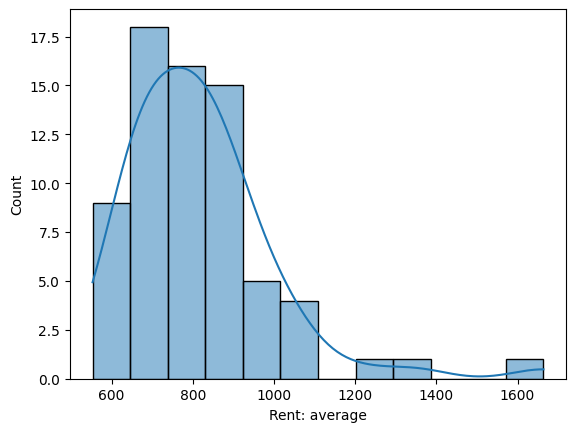

In [120]:
# it is a right_skewed histogram most of houses was rented for 800 Euros per month
a = sns.histplot(columns_data['Rent: average'], kde=True)

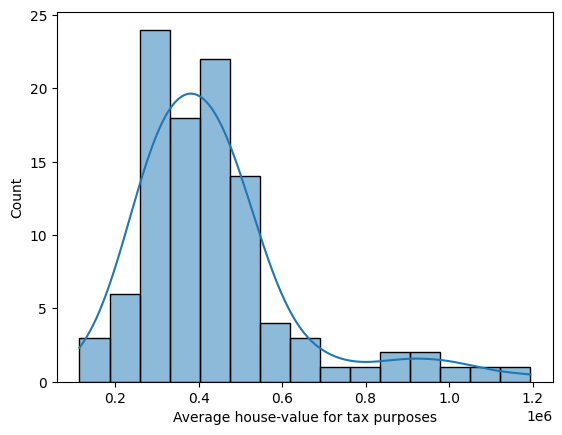

In [121]:
# its a bimodal histograms leaning toward right wing, meaning that average house-value mostly were either naer 0.3 or 0.5 (check units)
b = sns.histplot(columns_data['Average house-value for tax purposes'], kde=True)


(0.0, 400.0)

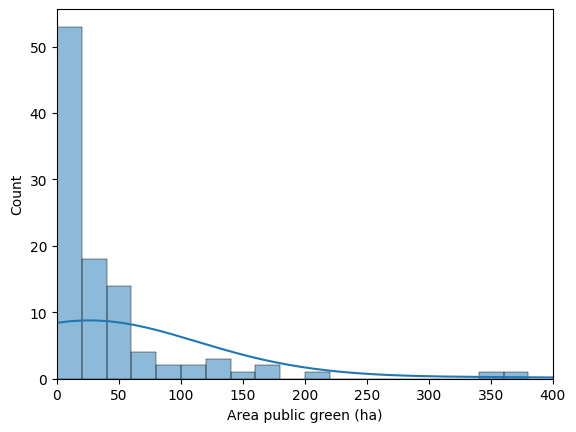

In [122]:
# its a right skewed histogram, meaning that Area public green are mostly from 0.1 to 20 ha
c = sns.histplot(columns_data['Area public green (ha)'], kde=True)

# I will exlude the a few ones above 2000 ha for the sake of value preservance
plt.xlim(0, 400)

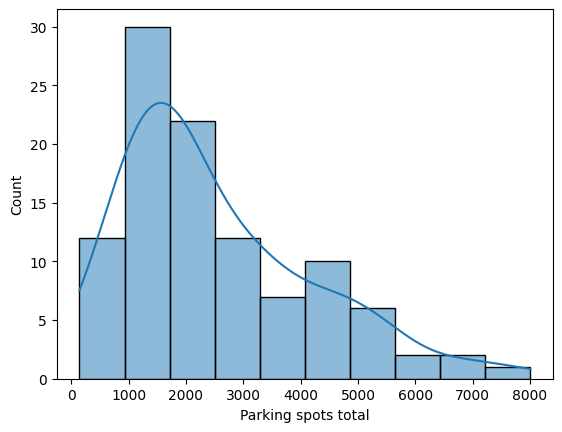

In [123]:
# its a right skewed histogram,total parking spots were between 1000 to 2000
d = sns.histplot(columns_data['Parking spots total'], kde=True)

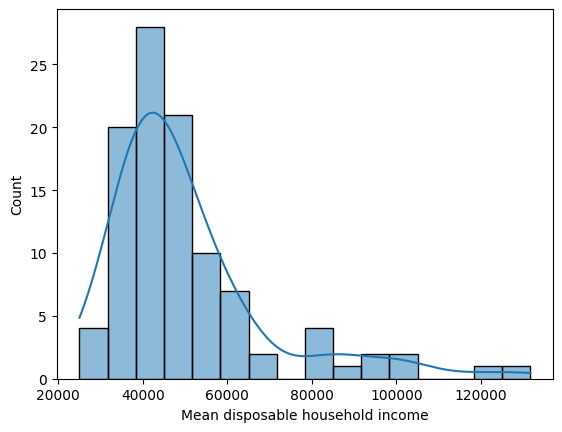

In [124]:
# # its a right skewed histogram, mean disposable household income is mostly 40,000 anually
e = sns.histplot(columns_data['Mean disposable household income'], kde=True)


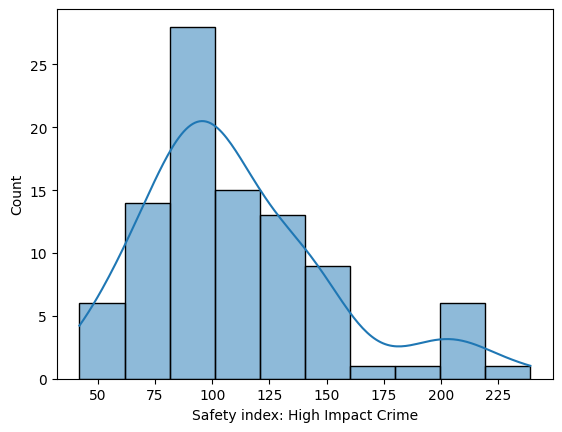

In [125]:
# its a bell-shaped histogram leaning towards right wing, safety index according to high impact crime is mostly 20
ff = sns.histplot(columns_data['Safety index: High Impact Crime'], kde=True)

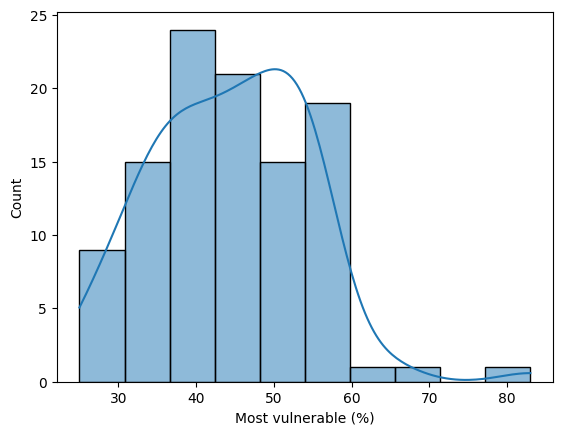

In [126]:
# it is a somehow uniform histogram since all the bars are more or less of the same height, the percentage of people from most vulnerable group is slightly above 20%
g = sns.histplot(columns_data['Most vulnerable (%)'], kde=True)
